<a href="https://www.kaggle.com/hamedetezadi/bird-species-prediction-using-cnn?scriptVersionId=89302039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In this project we will create a Convolutional Neural Network which will be able to predict species of the bird. We will use different layers and other hyperparameters for building, training and testing this multiclass classifictaion model. We will be using keras for this project.

In [1]:
# Library imports, We will start by importing some required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

Let's visualize some of the bird images that we will be working on. Also we will observe x and y dimensions of the image.


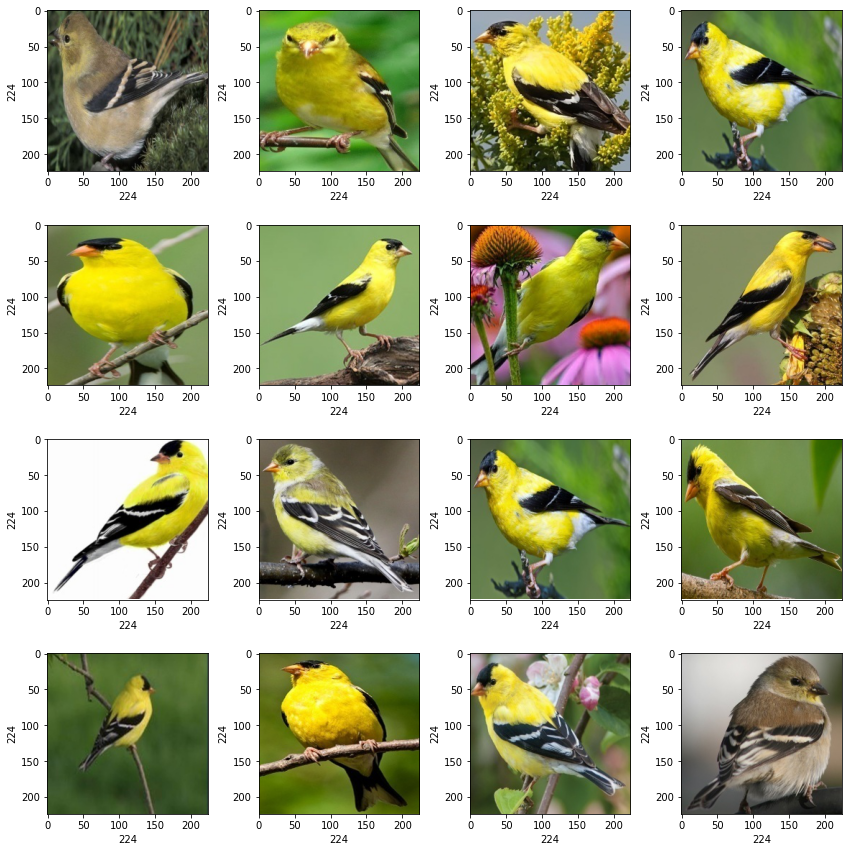

In [2]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "../input/bird-speciees-dataset/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Setting the root directory for the dataset and storing all the floders name of the dataset. We will also create 2 empty list for image and lables.


In [3]:
# Setting path and creating empty list
dir = "../input/bird-speciees-dataset/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

Next we will read all the images and convert it into array and appending the list created above with the image and its label.

In [4]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [5]:
# Visualize the number of classes count
#Check for class imbalance.
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [6]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [7]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [8]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

In [9]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

Next we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes. 

In [11]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [12]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [13]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

2022-03-04 20:07:51.697988: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

While compiling the model we need to set the type of loss which will be Categorical Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.


In [14]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [15]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

2022-03-04 20:07:53.085645: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
5/5 [==============================] - 3s 312ms/step - loss: 1.7908 - accuracy: 0.1660 - val_loss: 1.7711 - val_accuracy: 0.3231
Epoch 2/50
5/5 [==============================] - 1s 224ms/step - loss: 1.7259 - accuracy: 0.3050 - val_loss: 1.7088 - val_accuracy: 0.2692
Epoch 3/50
5/5 [==============================] - 1s 229ms/step - loss: 1.6547 - accuracy: 0.4015 - val_loss: 1.6849 - val_accuracy: 0.4308
Epoch 4/50
5/5 [==============================] - 1s 221ms/step - loss: 1.5606 - accuracy: 0.4903 - val_loss: 1.5446 - val_accuracy: 0.4077
Epoch 5/50
5/5 [==============================] - 1s 219ms/step - loss: 1.4834 - accuracy: 0.4054 - val_loss: 1.4498 - val_accuracy: 0.4538
Epoch 6/50
5/5 [==============================] - 1s 218ms/step - loss: 1.3502 - accuracy: 0.5367 - val_loss: 1.3311 - val_accuracy: 0.5077
Epoch 7/50
5/5 [==============================] - 1s 223ms/step - loss: 1.2239 - accuracy: 0.5695 - val_loss: 1.2143 - val_accuracy: 0.5769
Epoch 8/50
5/5 [====

In [16]:
# Saving model
model.save("bird_species.h5")

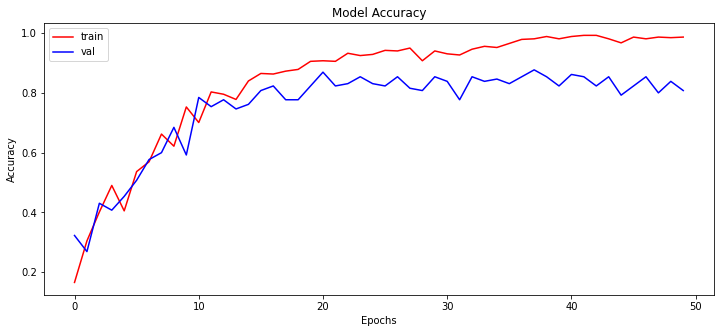

In [17]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

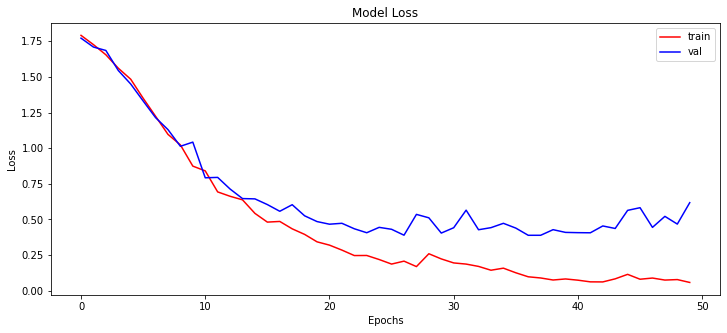

In [18]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 0s 16ms/step - loss: 0.4535 - accuracy: 0.8650
Test Accuracy: 86.50306463241577


In [20]:
# Storing predictions
y_pred = model.predict(x_test)

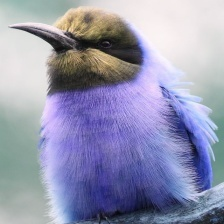

In [21]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [22]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  CARMINE BEE-EATER
Predicted :  BARN OWL
